In [2]:
import tensorflow as tf
import keras

import numpy as np
import keras.datasets.mnist as mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Keras and MNIST

https://keras.io/

https://en.wikipedia.org/wiki/MNIST_database

(60000, 'Number of train samples')
(10000, 'Number of test samples')
('x_train shape:', (60000, 28, 28))


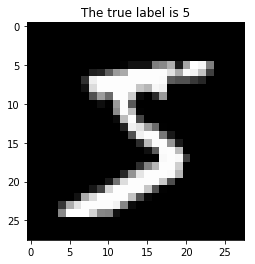

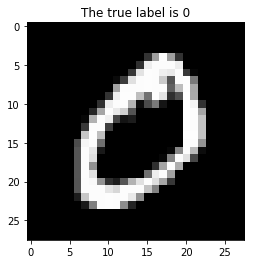

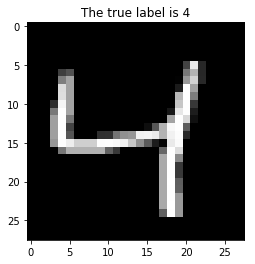

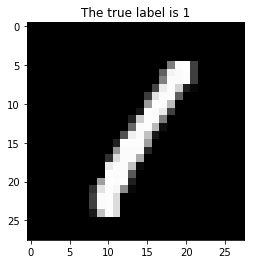

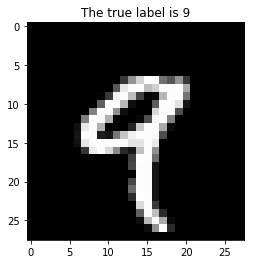

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape[0], 'Number of train samples')
print(x_test.shape[0], 'Number of test samples')
print('x_train shape:', x_train.shape)

# plot images as gray scale
for image_id in range(0, 5):
    plt.imshow(x_train[image_id], cmap=plt.get_cmap('gray'))
    plt.title("The true label is %s" % str(y_train[image_id]))
    plt.show()

## Overfitting and regularization

Deeper neural networks face the problem of overfitting.

![Overfitting](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/overfitting.png)

In [4]:
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale the inputs
x_train /= 255.0  # The image is in grayscale and has values between 0 and 255
x_test /= 255.0

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
print(x_train.shape, y_train.shape)

((60000, 28, 28, 1), (60000, 10))


A simple way to prevent overfitting is dropout. Dropout randomly removes neurons or connections in the network during training. There are many interpretations of dropout from "robust" representation to Bayesian inference.

https://www.youtube.com/watch?v=vAVOY8frLlQ

http://mlg.eng.cam.ac.uk/yarin/blog_3d801aa532c1ce.html

![Dropout](https://raw.githubusercontent.com/UCIDataScienceInitiative/LearningWithPython/master/figures/dropout.png)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Images are a 3D matrix, we have to flatten them to be 1D
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5)) # drop a unit with  50% probability.
model.add(Dense(150, kernel_initializer='orthogonal'))
model.add(Activation('sigmoid'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax')) # last layer, this has a softmax to do the classification

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 188,660
Trainable params: 188,660
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 79us/step - loss: 0.2271 - acc: 0.9357 - val_loss: 0.1407 - val_acc: 0.9577
Epoch 2/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.1902 - acc: 0.9428 - val_loss: 0.1296 - val_acc: 0.9613
Epoch 3/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.1737 - acc: 0.9476 - val_loss: 0.1198 - val_acc: 0.9648
Epoch 4/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.1568 - acc: 0.9530 - val_loss: 0.1116 - val_acc: 0.9683
Epoch 5/10
48000/48000 [==============================] - 4s 79us/step - loss: 0.1433 - acc: 0.9562 - val_loss: 0.1060 - val_acc: 0.9683
Epoch 6/10
48000/48000 [==============================] - 4s 78us/step - loss: 0.1335 - acc: 0.9601 - val_loss: 0.1019 - val_acc: 0.9693
Epoch 7/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.1291 - acc: 0.9601 - val_loss: 0.0984 - val_acc

('Keys for history object', ['acc', 'loss', 'val_acc', 'val_loss'])


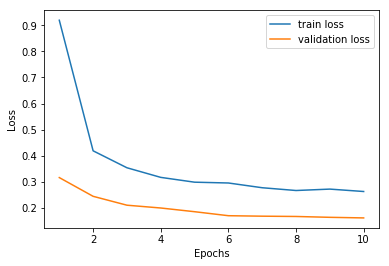

In [9]:
print("Keys for history object", history.history.keys())

train_loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = list(range(1, len(train_loss)+1))

plt.plot(epochs, train_loss, label="train loss")
plt.plot(epochs, valid_loss, label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [12]:
predictions = model.predict(x_test)

print(predictions.shape)
print(np.argmax(predictions, axis=1)[0:10])
print(np.argmax(y_test, axis=1)[0:10])

(10000, 10)
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


In [17]:
import keras.datasets.cifar10 as cifar10

(50000, 'Number of train samples')
(10000, 'Number of test samples')
('x_train shape:', (50000, 32, 32, 3))


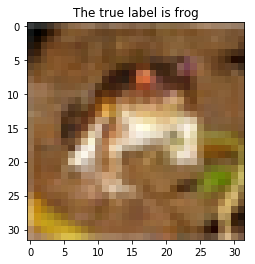

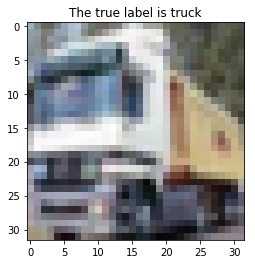

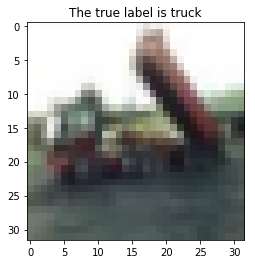

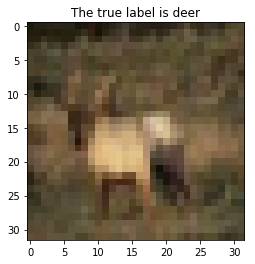

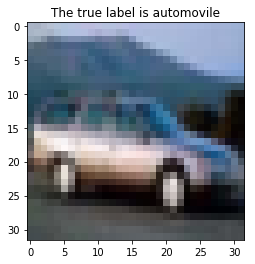

In [18]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# This is needed to know what each class means
label_id_to_class_name = {0:'airplane', 1:'automovile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 
                          6:'frog', 7:'horse', 8:'ship', 9:'truck'}

print(x_train.shape[0], 'Number of train samples')
print(x_test.shape[0], 'Number of test samples')
print('x_train shape:', x_train.shape)

# plot images
for image_id in range(0, 5):
    plt.imshow(x_train[image_id])
    plt.title("The true label is %s" % label_id_to_class_name[int(y_train[image_id])])
    plt.show()
    
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)